In [1]:
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np

### Measuring discharge using a tracer pulse

In [2]:
#%matplotlib inline


In [20]:
df_cal = read_csv('data/Example-calibration.csv', 
                index_col=1, 
                parse_dates=True, 
                skiprows=2,                 
              names=['#', 'SpC', 'Temp']
                )

In [21]:
df_cal['5-12-2023 20:27:35':]



,#,SpC,Temp
2023-05-12 20:27:35,100,762.70,22.00
2023-05-12 20:27:36,101,762.78,22.00
2023-05-12 20:27:37,102,762.62,22.00
2023-05-12 20:27:38,103,762.62,22.00
2023-05-12 20:27:39,104,762.55,22.00
...,...,...,...
2023-05-12 20:29:46,231,2009.97,22.54
2023-05-12 20:29:47,232,2010.01,22.52
2023-05-12 20:29:48,233,2009.97,22.54
2023-05-12 20:29:49,234,2009.97,22.54


<AxesSubplot:>

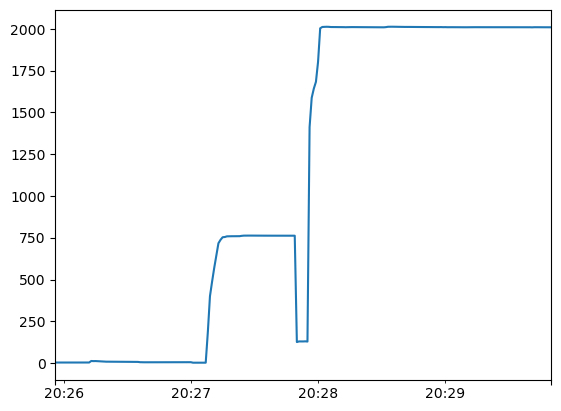

In [16]:
df_cal.SpC.plot()

In [22]:
df = read_csv('data/Example-Salt-Discharge.csv', 
                index_col=1, 
                parse_dates=True, 
                skiprows=2,                 
              names=['#', 'SpC', 'Temp']
                )

<AxesSubplot:>

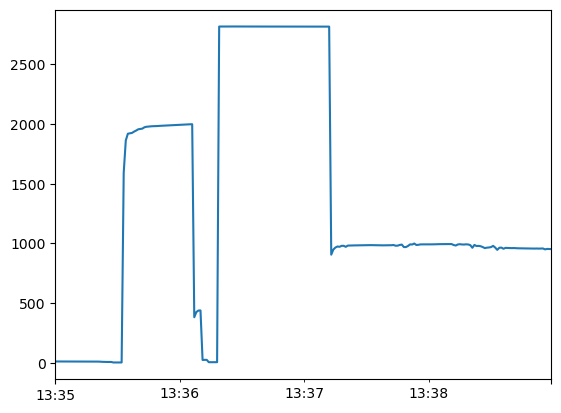

In [23]:
df.SpC['5-11-2023 13:35':'5-11-2023 13:38'].plot()

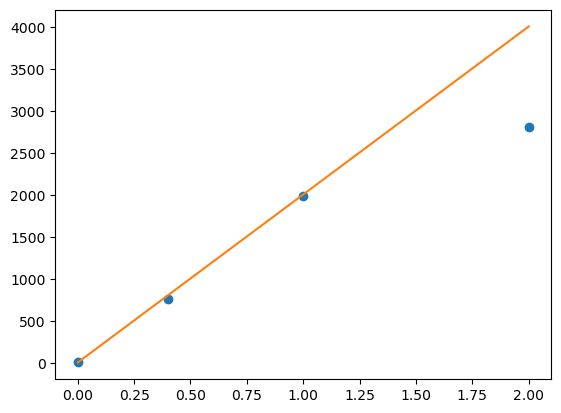

In [23]:
df.SpC['5-11-2023 13:35:05':'5-11-2023 13:38']

cond = np.array([12, 765, 1997,2814])
C_salt = np.array([0, 0.4, 1, 2])
plt.plot(C_salt, cond, 'o')
x = np.linspace(0,2,20)
y = 1000/0.5*x + 10
plt.plot(x,y)

In [21]:
k = 1000*C_salt/cond
k

array([0.        , 0.52287582, 0.50075113, 0.71073205])

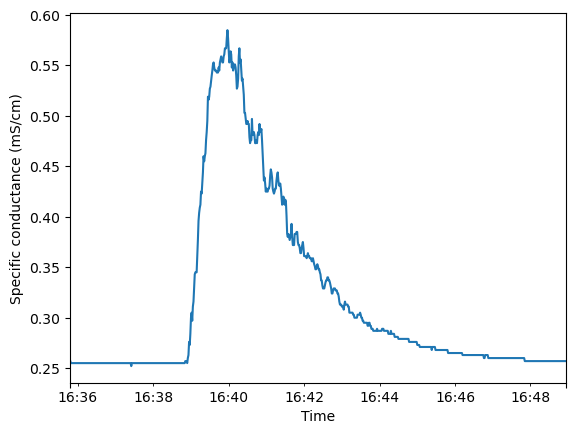

In [23]:
cond = df['cond']
cond.plot()
cond_pulse = cond['2009/06/09 16:37':'2009/06/09 16:47']
#cond_pulse.plot()
plt.xlabel('Time')
plt.ylabel('Specific conductance (mS/cm)')
plt.savefig('spc-salt-tracer.png')

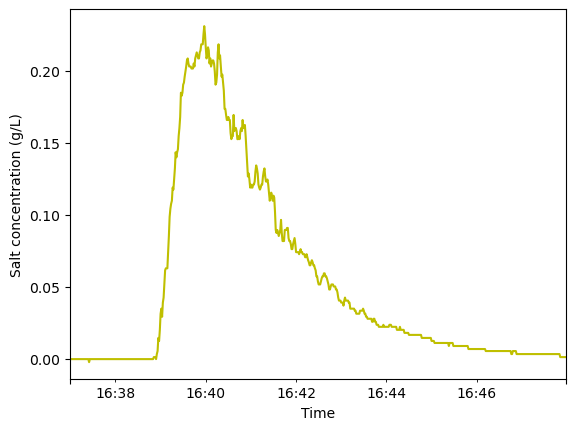

In [26]:

k = 0.7 # 0.7 (g*cm)/(mS*L) conversion constant from mS/cm to g/L NaCl
cond_background = 0.255
C_salt = k*(cond_pulse - cond_background) 

C_salt.plot(color='y')
plt.xlabel('Time')
plt.ylabel('Salt concentration (g/L)')
plt.savefig('salt-conc-tracer.png')

In [16]:
dt = 1 # one second between measurements
m = 500 # mass of salt in grams


To calculate discharge from the conductivity measurements, we use

$$Q = \frac{m}{\Sigma_i (C_{salt,i} dt)}$$,

where $Q$ is the discharge, $C_{salt,i}$ is the timeseries of salt concentrations, and $dt$ is the time between consecutive conductivity measurements.

In [18]:
Q = m / (C_salt.sum()*dt)
print('discharge =', Q, 'L/s')

discharge = 14.708131831927235 L/s


### Measuring discharge at a weir

### Measuring discharge with a bucket and stopwatch

In [21]:
# Read in time and volume data (or bucket depth/diameter) from spreadsheet

# Spreadsheet will have 5 duplicate measurements for each site that need to be averaged

In [ ]:
#Calculate discharges and average